<a href="https://colab.research.google.com/github/PascalWynette/FII-NX1Intl-ELAINE-WIJAYA/blob/main/NexHax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/NexHack/'

Mounted at /content/drive


### **The MODEL**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
import random
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.Food101(root="./data", split="train", transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
test_dataset = datasets.Food101(root="./data", split="test", transform=transform, download=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

num_classes = len(train_dataset.classes)

 93%|█████████▎| 4.65G/5.00G [03:34<00:15, 22.4MB/s]

In [ ]:
full_dataset = train_dataset

subset_size = int(len(full_dataset))
subset_indices = random.sample(range(len(full_dataset)), subset_size)
subset = Subset(full_dataset, subset_indices)

train_size = int(0.8 * subset_size)
val_size = subset_size - train_size
train_subset, val_subset = torch.utils.data.random_split(subset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

num_classes = len(full_dataset.classes)


In [ ]:
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []

def evaluate_val(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []


In [ ]:
training_args = {
    "learning_rate": 1e-5,
    "weight_decay": 0.02,
    "per_device_train_batch_size": 32,
    "num_train_epochs": 20,
    "logging_steps": 10,
    "step_lr_step_size": 2,
    "step_lr_gamma": 0.1,
}

In [ ]:
tiny_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
tiny_batch = next(iter(tiny_loader))
images, labels = tiny_batch[0].to(device), tiny_batch[1].to(device)

model.train()
for i in range(100):
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    print(f"[Step {i+1}] Loss: {loss.item():.4f}")

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=training_args["learning_rate"],
    weight_decay=training_args["weight_decay"]
)
def lr_lambda(epoch):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return float(epoch + 1) / warmup_epochs
    return 1.0

scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

epochs = training_args["num_train_epochs"]
logging_steps = training_args["logging_steps"]
global_step = 0

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        global_step += 1

        if global_step % logging_steps == 0:
            print(f"[Step {global_step}] Loss: {loss.item():.4f}")

    scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"📘 Epoch {epoch+1}/{epochs} - Avg Training Loss: {avg_train_loss:.4f}")


print("✅ Training complete")


[Step 10] Loss: 4.1488
[Step 20] Loss: 4.5112
[Step 30] Loss: 4.0904
[Step 40] Loss: 4.0379
[Step 50] Loss: 4.2081
[Step 60] Loss: 4.0219
[Step 70] Loss: 4.3869
[Step 80] Loss: 4.1716
[Step 90] Loss: 4.0650
[Step 100] Loss: 3.9564
[Step 110] Loss: 3.8677
[Step 120] Loss: 4.0251
[Step 130] Loss: 3.9226
[Step 140] Loss: 4.3001
[Step 150] Loss: 3.9278
[Step 160] Loss: 4.1120
[Step 170] Loss: 4.2676
[Step 180] Loss: 3.9945
[Step 190] Loss: 3.7172
[Step 200] Loss: 3.7584
[Step 210] Loss: 4.0755
[Step 220] Loss: 3.8309
[Step 230] Loss: 3.8022
[Step 240] Loss: 4.1181
[Step 250] Loss: 4.0258
[Step 260] Loss: 4.0064
[Step 270] Loss: 4.2213
[Step 280] Loss: 4.1547
[Step 290] Loss: 4.0944
[Step 300] Loss: 3.9386
[Step 310] Loss: 4.0079
[Step 320] Loss: 3.7295
[Step 330] Loss: 4.1446
[Step 340] Loss: 3.8298
[Step 350] Loss: 3.9528
[Step 360] Loss: 4.1868
[Step 370] Loss: 3.7980
[Step 380] Loss: 3.8407
[Step 390] Loss: 3.6583
[Step 400] Loss: 3.7339
[Step 410] Loss: 3.8187
[Step 420] Loss: 4.1793
[

In [ ]:
new_training_args = {
    "learning_rate": 1e-3,
    "weight_decay": 0.001,
    "num_additional_epochs": 5,
    "logging_steps": 10,
}

optimizer = optim.Adam(
    model.parameters(),
    lr=new_training_args["learning_rate"],
    weight_decay=new_training_args["weight_decay"]
)

scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=new_training_args["num_additional_epochs"])

starting_epoch = 20
global_step = 0

for epoch in range(starting_epoch, starting_epoch + new_training_args["num_additional_epochs"]):
    model.train()
    total_loss = 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        global_step += 1

        if global_step % new_training_args["logging_steps"] == 0:
            print(f"[Step {global_step}] Loss: {loss.item():.4f}")

    scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"📘 Epoch {epoch+1} - Avg Training Loss: {avg_train_loss:.4f}")

    evaluate_val(model, val_loader, criterion, device)

print("✅ Continued training complete")


[Step 10] Loss: 4.0743
[Step 20] Loss: 4.0034
[Step 30] Loss: 4.1695
[Step 40] Loss: 3.9216
[Step 50] Loss: 3.7699
[Step 60] Loss: 3.6231
[Step 70] Loss: 4.1074
[Step 80] Loss: 3.9075
[Step 90] Loss: 3.7336
[Step 100] Loss: 3.7646
[Step 110] Loss: 3.7954
[Step 120] Loss: 4.0164
[Step 130] Loss: 3.4103
[Step 140] Loss: 4.0810
[Step 150] Loss: 3.8339
[Step 160] Loss: 3.8368
[Step 170] Loss: 4.1883
[Step 180] Loss: 3.8612
[Step 190] Loss: 3.6968
[Step 200] Loss: 3.7308
[Step 210] Loss: 4.0822
[Step 220] Loss: 3.4873
[Step 230] Loss: 3.7050
[Step 240] Loss: 3.8901
[Step 250] Loss: 3.8900
[Step 260] Loss: 3.6682
[Step 270] Loss: 3.9500
[Step 280] Loss: 3.7188
[Step 290] Loss: 3.5835
[Step 300] Loss: 4.1595
[Step 310] Loss: 4.1349
[Step 320] Loss: 4.1262
[Step 330] Loss: 3.9728
[Step 340] Loss: 3.8384
[Step 350] Loss: 3.9542
[Step 360] Loss: 3.9212
[Step 370] Loss: 3.9395
[Step 380] Loss: 3.9816
[Step 390] Loss: 3.9859
[Step 400] Loss: 3.6065
[Step 410] Loss: 3.7684
[Step 420] Loss: 3.6544
[

In [ ]:
new_training_args = {
    "learning_rate": 1e-3,
    "weight_decay": 0.001,
    "num_additional_epochs": 15,
    "logging_steps": 10,
}

optimizer = optim.Adam(
    model.parameters(),
    lr=new_training_args["learning_rate"],
    weight_decay=new_training_args["weight_decay"]
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

starting_epoch = 25
global_step = 0

for epoch in range(starting_epoch, starting_epoch + new_training_args["num_additional_epochs"]):
    model.train()
    total_loss = 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        global_step += 1

        if global_step % new_training_args["logging_steps"] == 0:
            print(f"[Step {global_step}] Loss: {loss.item():.4f}")

    scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"📘 Epoch {epoch+1} - Avg Training Loss: {avg_train_loss:.4f}")

    evaluate_val(model, val_loader, criterion, device)

print("✅ Continued training complete")

[Step 10] Loss: 3.2470
[Step 20] Loss: 3.7849
[Step 30] Loss: 3.0097
[Step 40] Loss: 4.0659
[Step 50] Loss: 3.4907
[Step 60] Loss: 3.2783
[Step 70] Loss: 3.2306
[Step 80] Loss: 3.1643
[Step 90] Loss: 2.8836
[Step 100] Loss: 3.5572
[Step 110] Loss: 3.3544
[Step 120] Loss: 3.6359
[Step 130] Loss: 3.4556
[Step 140] Loss: 3.0833
[Step 150] Loss: 3.0657
[Step 160] Loss: 3.4813
[Step 170] Loss: 3.7157
[Step 180] Loss: 3.0730
[Step 190] Loss: 2.7763
[Step 200] Loss: 3.4802
[Step 210] Loss: 3.9062
[Step 220] Loss: 3.6892
[Step 230] Loss: 3.9088
[Step 240] Loss: 3.3388
[Step 250] Loss: 3.1946
[Step 260] Loss: 3.3498
[Step 270] Loss: 3.3107
[Step 280] Loss: 3.2720
[Step 290] Loss: 4.0614
[Step 300] Loss: 2.9693
[Step 310] Loss: 2.8540
[Step 320] Loss: 2.9629
[Step 330] Loss: 2.6533
[Step 340] Loss: 3.2079
[Step 350] Loss: 3.5346
[Step 360] Loss: 3.2922
[Step 370] Loss: 3.2377
[Step 380] Loss: 3.4169
[Step 390] Loss: 3.4910
[Step 400] Loss: 3.0242
[Step 410] Loss: 3.3152
[Step 420] Loss: 3.3835
[

In [ ]:
new_training_args = {
    "learning_rate": 1e-4,
    "weight_decay": 0.005,
    "num_additional_epochs": 15,
    "logging_steps": 10,
}
optimizer = optim.Adam(
    model.parameters(),
    lr=new_training_args["learning_rate"],
    weight_decay=new_training_args["weight_decay"]
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

starting_epoch = 40
global_step = 0

for epoch in range(starting_epoch, starting_epoch + new_training_args["num_additional_epochs"]):
    model.train()
    total_loss = 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        global_step += 1

        if global_step % new_training_args["logging_steps"] == 0:
            print(f"[Step {global_step}] Loss: {loss.item():.4f}")

    scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"📘 Epoch {epoch+1} - Avg Training Loss: {avg_train_loss:.4f}")

    evaluate_val(model, val_loader, criterion, device)

print("✅ Continued training complete")

[Step 10] Loss: 2.8996
[Step 20] Loss: 2.9825
[Step 30] Loss: 2.9736
[Step 40] Loss: 2.2423
[Step 50] Loss: 2.5002
[Step 60] Loss: 2.3907
[Step 70] Loss: 2.5786
[Step 80] Loss: 2.5043
[Step 90] Loss: 2.5447
[Step 100] Loss: 2.4959
[Step 110] Loss: 2.5949
[Step 120] Loss: 2.5815
[Step 130] Loss: 3.0214
[Step 140] Loss: 2.8642
[Step 150] Loss: 2.0740
[Step 160] Loss: 2.7558
[Step 170] Loss: 2.5127
[Step 180] Loss: 2.4783
[Step 190] Loss: 2.6986
[Step 200] Loss: 2.7745
[Step 210] Loss: 2.2503
[Step 220] Loss: 2.6669
[Step 230] Loss: 2.9887
[Step 240] Loss: 2.9217
[Step 250] Loss: 2.4554
[Step 260] Loss: 2.6888
[Step 270] Loss: 2.2445
[Step 280] Loss: 2.3707
[Step 290] Loss: 2.2342
[Step 300] Loss: 2.5975
[Step 310] Loss: 2.7981
[Step 320] Loss: 2.9354
[Step 330] Loss: 2.1851
[Step 340] Loss: 2.6840
[Step 350] Loss: 2.6771
[Step 360] Loss: 2.7968
[Step 370] Loss: 2.6644
[Step 380] Loss: 2.9910
[Step 390] Loss: 2.6233
[Step 400] Loss: 2.2438
[Step 410] Loss: 3.0317
[Step 420] Loss: 2.6126
[

In [ ]:
save_path = '/content/drive/My Drive/NexHack/model_weights_2.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_weights_1 = MyResNet50()

torch.save(model_weights_1.state_dict(), 'model_weights_2.pth')
torch.save(model_weights_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/model_full_2.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_full_1 = MyResNet50()

torch.save(model_full_1, 'model_full_2.pth')
torch.save(model_full_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/checkpoint_2.pth'


checkpoint = {
    'epoch': 40,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'training_args': training_args
}

torch.save(checkpoint, save_path)

print("✅ Saved training checkpoint to Google Drive.")

✅ Saved training checkpoint to Google Drive.


In [ ]:
new_training_args = {
    "learning_rate": 1e-3,
    "weight_decay": 0.009,
    "num_additional_epochs": 10,
    "logging_steps": 10,
}

optimizer = optim.Adam(
    model.parameters(),
    lr=new_training_args["learning_rate"],
    weight_decay=new_training_args["weight_decay"]
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

starting_epoch = 55
global_step = 0

for epoch in range(starting_epoch, starting_epoch + new_training_args["num_additional_epochs"]):
    model.train()
    total_loss = 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        global_step += 1

        if global_step % new_training_args["logging_steps"] == 0:
            print(f"[Step {global_step}] Loss: {loss.item():.4f}")

    scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"📘 Epoch {epoch+1} - Avg Training Loss: {avg_train_loss:.4f}")

    evaluate_val(model, val_loader, criterion, device)

print("✅ Continued training complete")

[Step 10] Loss: 3.0896
[Step 20] Loss: 3.1614
[Step 30] Loss: 2.5643
[Step 40] Loss: 3.2348
[Step 50] Loss: 2.9746
[Step 60] Loss: 3.0579
[Step 70] Loss: 2.7880
[Step 80] Loss: 3.5696
[Step 90] Loss: 2.4390
[Step 100] Loss: 2.9733
[Step 110] Loss: 3.6060
[Step 120] Loss: 2.9335
[Step 130] Loss: 3.4842
[Step 140] Loss: 2.8087
[Step 150] Loss: 3.7450
[Step 160] Loss: 2.9844
[Step 170] Loss: 2.9476
[Step 180] Loss: 2.6357
[Step 190] Loss: 3.1413
[Step 200] Loss: 3.1753
[Step 210] Loss: 2.8750
[Step 220] Loss: 2.8709
[Step 230] Loss: 2.6737
[Step 240] Loss: 2.9442
[Step 250] Loss: 3.3000
[Step 260] Loss: 2.8154
[Step 270] Loss: 3.4085
[Step 280] Loss: 2.9416
[Step 290] Loss: 2.6335
[Step 300] Loss: 3.0595
[Step 310] Loss: 2.5250
[Step 320] Loss: 2.9407
[Step 330] Loss: 3.1740
[Step 340] Loss: 3.1796
[Step 350] Loss: 3.1487
[Step 360] Loss: 3.4645
[Step 370] Loss: 2.9010
[Step 380] Loss: 2.6087
[Step 390] Loss: 3.0878
[Step 400] Loss: 2.7550
[Step 410] Loss: 2.9412
[Step 420] Loss: 2.7641
[

In [ ]:
save_path = '/content/drive/My Drive/NexHack/model_weights_3.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_weights_1 = MyResNet50()

torch.save(model_weights_1.state_dict(), 'model_weights_3.pth')
torch.save(model_weights_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/model_full_3.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_full_1 = MyResNet50()

torch.save(model_full_1, 'model_full_3.pth')
torch.save(model_full_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/checkpoint_3.pth'

checkpoint = {
    'epoch': 40,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'training_args': training_args
}

torch.save(checkpoint, save_path)

print("✅ Saved training checkpoint to Google Drive.")

In [ ]:
new_training_args = {
    "learning_rate": 1e-4,
    "weight_decay": 0.01,
    "num_additional_epochs": 5,
    "logging_steps": 10,
}

optimizer = optim.Adam(
    model.parameters(),
    lr=new_training_args["learning_rate"],
    weight_decay=new_training_args["weight_decay"]
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

starting_epoch = 65
global_step = 0

for epoch in range(starting_epoch, starting_epoch + new_training_args["num_additional_epochs"]):
    model.train()
    total_loss = 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        global_step += 1

        if global_step % new_training_args["logging_steps"] == 0:
            print(f"[Step {global_step}] Loss: {loss.item():.4f}")

    scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"📘 Epoch {epoch+1} - Avg Training Loss: {avg_train_loss:.4f}")

    evaluate_val(model, val_loader, criterion, device)

print("✅ Continued training complete")

[Step 10] Loss: 2.4200
[Step 20] Loss: 2.1581
[Step 30] Loss: 2.6574
[Step 40] Loss: 2.4388
[Step 50] Loss: 2.5414
[Step 60] Loss: 2.4306
[Step 70] Loss: 2.7073
[Step 80] Loss: 2.3225
[Step 90] Loss: 2.5070
[Step 100] Loss: 2.6723
[Step 110] Loss: 2.8661
[Step 120] Loss: 2.5591
[Step 130] Loss: 2.6330
[Step 140] Loss: 2.5135
[Step 150] Loss: 2.2618
[Step 160] Loss: 2.7541
[Step 170] Loss: 2.9095
[Step 180] Loss: 2.4101
[Step 190] Loss: 2.7965
[Step 200] Loss: 2.6819
[Step 210] Loss: 2.2223
[Step 220] Loss: 2.6175
[Step 230] Loss: 2.2463
[Step 240] Loss: 2.2848
[Step 250] Loss: 2.5888
[Step 260] Loss: 2.3973
[Step 270] Loss: 2.1999
[Step 280] Loss: 2.6054
[Step 290] Loss: 2.6306
[Step 300] Loss: 2.7867
[Step 310] Loss: 2.6956
[Step 320] Loss: 2.1173
[Step 330] Loss: 2.7090
[Step 340] Loss: 1.9435
[Step 350] Loss: 2.7138
[Step 360] Loss: 2.5221
[Step 370] Loss: 2.3594
[Step 380] Loss: 2.3018
[Step 390] Loss: 2.9288
[Step 400] Loss: 2.4330
[Step 410] Loss: 2.3757
[Step 420] Loss: 2.9263
[

In [ ]:
save_path = '/content/drive/My Drive/NexHack/model_weights_4.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_weights_1 = MyResNet50()

torch.save(model_weights_1.state_dict(), 'model_weights_4.pth')
torch.save(model_weights_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/model_full_4.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_full_1 = MyResNet50()

torch.save(model_full_1, 'model_full_4.pth')
torch.save(model_full_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/checkpoint_4.pth'

checkpoint = {
    'epoch': 40,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'training_args': training_args
}

torch.save(checkpoint, save_path)

print("✅ Saved training checkpoint to Google Drive.")

KeyboardInterrupt: 

### **New Model**

In [ ]:
num_classes = 101
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(2048, num_classes)

checkpoint_path = '/content/drive/My Drive/NexHack/checkpoint_4.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

new_training_args = {
    "learning_rate": 3e-4,
    "weight_decay": 5e-4,
    "num_additional_epochs": 15,
    "logging_steps": 10,
}

optimizer = optim.Adam(model.parameters(),
                       lr=new_training_args["learning_rate"],
                       weight_decay=new_training_args["weight_decay"])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
criterion = nn.CrossEntropyLoss()
model.to(device)

starting_epoch = checkpoint['epoch']
global_step = 0
train_losses = []

def evaluate_val(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)

    val_losses.append(avg_val_loss)
    val_accuracies.append(accuracy)
    val_precisions.append(precision)

    print(f"📊 Final Validation — Loss: {avg_val_loss:.4f} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f}")

for epoch in range(starting_epoch, starting_epoch + new_training_args["num_additional_epochs"]):
    model.train()
    total_loss = 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        global_step += 1

        if global_step % new_training_args["logging_steps"] == 0:
            print(f"[Step {global_step}] Loss: {loss.item():.4f}")

    scheduler.step()
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"📘 Epoch {epoch + 1} - Avg Training Loss: {avg_train_loss:.4f}")

    evaluate_val(model, val_loader, criterion, device)

print("✅ Continued training complete")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Step 10] Loss: 2.0447
[Step 20] Loss: 2.4238
[Step 30] Loss: 2.3454
[Step 40] Loss: 2.5764
[Step 50] Loss: 2.5672
[Step 60] Loss: 2.6720
[Step 70] Loss: 1.9865
[Step 80] Loss: 2.2443
[Step 90] Loss: 2.4006
[Step 100] Loss: 2.1740
[Step 110] Loss: 2.0742
[Step 120] Loss: 2.4228
[Step 130] Loss: 2.6764
[Step 140] Loss: 2.8126
[Step 150] Loss: 2.0586
[Step 160] Loss: 2.1948
[Step 170] Loss: 2.3934
[Step 180] Loss: 2.4214
[Step 190] Loss: 2.9980
[Step 200] Loss: 2.1040
[Step 210] Loss: 2.1892
[Step 220] Loss: 2.6544
[Step 230] Loss: 2.4610
[Step 240] Loss: 2.6737
[Step 250] Loss: 2.6814
[Step 260] Loss: 2.4827
[Step 270] Loss: 2.4284
[Step 280] Loss: 2.5538
[Step 290] Loss: 2.2473
[Step 300] Loss: 2.8773
[Step 310] Loss: 3.0561
[Step 320] Loss: 2.3896
[Step 330] Loss: 2.4687
[Step 340] Loss: 2.4388
[Step 350] Loss: 2.3006
[Step 360] Loss: 2.4746
[Step 370] Loss: 2.6394
[Step 380] Loss: 2.3361
[Step 390] Loss: 2.9191
[Step 400] Loss: 2.2343
[Step 410] Loss: 2.4828
[Step 420] Loss: 2.5228
[

In [ ]:
save_path = '/content/drive/My Drive/NexHack/model_weights_5.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_weights_1 = MyResNet50()

torch.save(model_weights_1.state_dict(), 'model_weights_5.pth')
torch.save(model_weights_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/model_full_5.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_full_1 = MyResNet50()

torch.save(model_full_1, 'model_full_5.pth')
torch.save(model_full_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/checkpoint_5.pth'

checkpoint = {
    'epoch': 40,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'training_args': new_training_args
}

torch.save(checkpoint, save_path)

print("✅ Saved training checkpoint to Google Drive.")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Saved training checkpoint to Google Drive.


In [ ]:
num_classes = 101
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(2048, num_classes)

checkpoint_path = '/content/drive/My Drive/NexHack/checkpoint_4.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

new_training_args = {
    "learning_rate": 1e-4,
    "weight_decay": 0.001,
    "num_additional_epochs": 10,
    "logging_steps": 10,
}

optimizer = optim.Adam(
    model.parameters(),
    lr=new_training_args["learning_rate"],
    weight_decay=new_training_args["weight_decay"]
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

model.to(device)

starting_epoch = checkpoint['epoch']
global_step = 0
train_losses = []

def evaluate_val(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = val_loss / len(val_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)

    print(f"🔍 Validation — Loss: {avg_loss:.4f} | Accuracy: {accuracy*100:.2f}% | Precision: {precision*100:.2f}%")

for epoch in range(starting_epoch, starting_epoch + new_training_args["num_additional_epochs"]):
    model.train()
    total_loss = 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        global_step += 1

        if global_step % new_training_args["logging_steps"] == 0:
            print(f"[Step {global_step}] Loss: {loss.item():.4f}")

    scheduler.step()
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"📘 Epoch {epoch + 1} - Avg Training Loss: {avg_train_loss:.4f}")

    # Evaluate after each epoch
    evaluate_val(model, val_loader, criterion, device)

print("✅ Continued training complete")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Step 10] Loss: 3.0304
[Step 20] Loss: 3.1425
[Step 30] Loss: 2.7836
[Step 40] Loss: 2.8386
[Step 50] Loss: 3.0405
[Step 60] Loss: 2.8248
[Step 70] Loss: 2.7701
[Step 80] Loss: 2.4632
[Step 90] Loss: 2.5223
[Step 100] Loss: 2.9752
[Step 110] Loss: 2.5034
[Step 120] Loss: 3.2254
[Step 130] Loss: 2.3561
[Step 140] Loss: 3.0030
[Step 150] Loss: 2.3091
[Step 160] Loss: 2.9455
[Step 170] Loss: 3.0533
[Step 180] Loss: 2.9488
[Step 190] Loss: 2.3972
[Step 200] Loss: 3.3894
[Step 210] Loss: 2.9466
[Step 220] Loss: 2.8679
[Step 230] Loss: 2.9533
[Step 240] Loss: 2.7291
[Step 250] Loss: 3.4245
[Step 260] Loss: 2.3871
[Step 270] Loss: 2.9051
[Step 280] Loss: 2.7041
[Step 290] Loss: 2.6215
[Step 300] Loss: 2.9355
[Step 310] Loss: 2.8402
[Step 320] Loss: 2.7117
[Step 330] Loss: 3.3348
[Step 340] Loss: 3.0667
[Step 350] Loss: 2.9721
[Step 360] Loss: 3.0521
[Step 370] Loss: 2.9260
[Step 380] Loss: 3.1146
[Step 390] Loss: 2.8377
[Step 400] Loss: 2.9644
[Step 410] Loss: 2.9458
[Step 420] Loss: 3.3993
[

In [ ]:
save_path = '/content/drive/My Drive/NexHack/model_weights_6.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_weights_1 = MyResNet50()

torch.save(model_weights_1.state_dict(), 'model_weights_6.pth')
torch.save(model_weights_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/model_full_6.pth'

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=True)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)

    def forward(self, x):
        return self.base(x)

model_full_1 = MyResNet50()

torch.save(model_full_1, 'model_full_6.pth')
torch.save(model_full_1.state_dict(), save_path)

save_path = '/content/drive/My Drive/NexHack/checkpoint_6.pth'

checkpoint = {
    'epoch': 40,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'training_args': new_training_args
}

torch.save(checkpoint, save_path)

print("Saved to Google Drive.")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are depreca

Saved to Google Drive.


In [ ]:
val_losses = []
val_accuracies = []
val_precisions = []

def evaluate_val(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)

    val_losses.append(avg_val_loss)
    val_accuracies.append(accuracy)
    val_precisions.append(precision)

    print(f"📊 Final Validation — Loss: {avg_val_loss:.4f} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f}")

evaluate_val(model, val_loader, criterion, device)


📊 Final Validation — Loss: 2.7829 | Accuracy: 0.4222 | Precision: 0.4072


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet mean
                         std=[0.229, 0.224, 0.225])   # ImageNet std
])

test_dataset = datasets.Food101(root="./data", split="test", transform=transform, download=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

num_classes = 101
model = models.resnet50(pretrained=False)  # pretrained=False since you're loading your own weights
model.fc = torch.nn.Linear(2048, num_classes)

checkpoint_path = '/content/drive/My Drive/NexHack/checkpoint_4.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

model.to(device)
model.eval()

all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

acc = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds, average='macro', zero_division=0)

print(f"Test Accuracy: {acc * 100:.2f}%")
print(f"Test Precision (macro): {prec * 100:.2f}%")


Test Accuracy: 42.25%
Test Precision (macro): 40.57%


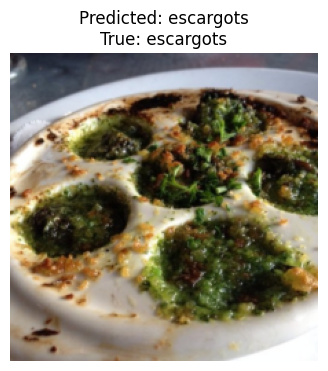

In [ ]:
import matplotlib.pyplot as plt
import random

sample_idx = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[sample_idx]
class_names = test_dataset.classes
model_input = image.unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output = model(model_input)
    pred_idx = torch.argmax(output, dim=1).item()
    pred_label = class_names[pred_idx]

def imshow(img):
    img = img.permute(1, 2, 0).numpy()
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

plt.figure(figsize=(4, 4))
imshow(image)
plt.title(f"Predicted: {pred_label}\nTrue: {class_names[label]}")
plt.show()

In [ ]:
# 1. Mount Drive and Load CSVs
from google.colab import drive
import pandas as pd
from rapidfuzz import process, fuzz

drive.mount('/content/drive')
path = '/content/drive/My Drive/NexHack/'

food = pd.read_csv(path + 'food.csv', low_memory=False)
food_nutrient = pd.read_csv(path + 'food_nutrient.csv', low_memory=False)
nutrient = pd.read_csv(path + 'nutrient.csv', low_memory=False)
branded_food = pd.read_csv(path + 'branded_food.csv', low_memory=False)

sodium_id = nutrient[nutrient['name'] == 'Sodium, Na']['id'].values[0]

foundation_df = food[['fdc_id', 'description']].assign(source='foundation')
branded_df = branded_food[['fdc_id', 'brand_name', 'subbrand_name', 'short_description']].rename(
    columns={'short_description': 'description'}
).assign(source='branded')
food_all = pd.concat([foundation_df, branded_df], ignore_index=True)
food_all['search_name'] = food_all['description'].fillna('').str.lower().str.strip()
choices = food_all['search_name'].tolist()

def get_sodium(fdc_id):
    nutrients = food_nutrient[(food_nutrient['fdc_id'] == fdc_id) & (food_nutrient['nutrient_id'] == sodium_id)]
    return None if nutrients.empty else nutrients.iloc[0]['amount']

def recommend_water(sodium_mg):
    if sodium_mg is None:
        return "Sodium content unavailable."
    if sodium_mg > 1500:
        extra_water = round((sodium_mg - 1500) * 0.003, 2)
        return f"High sodium! Drink at least {extra_water}L extra water."
    return "Sodium is within the recommended daily intake."

In [4]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MyResNet50(nn.Module):
    def __init__(self, num_classes=101):
        super(MyResNet50, self).__init__()
        self.base = models.resnet50(pretrained=False)
        self.base.fc = nn.Linear(self.base.fc.in_features, num_classes)
    def forward(self, x):
        return self.base(x)

model = MyResNet50()
checkpoint_path = '/content/drive/My Drive/NexHack/checkpoint_6.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
train_dataset = datasets.Food101(root="./data", split="train", transform=transform, download=True)

RuntimeError: Error(s) in loading state_dict for MyResNet50:
	Missing key(s) in state_dict: "base.conv1.weight", "base.bn1.weight", "base.bn1.bias", "base.bn1.running_mean", "base.bn1.running_var", "base.layer1.0.conv1.weight", "base.layer1.0.bn1.weight", "base.layer1.0.bn1.bias", "base.layer1.0.bn1.running_mean", "base.layer1.0.bn1.running_var", "base.layer1.0.conv2.weight", "base.layer1.0.bn2.weight", "base.layer1.0.bn2.bias", "base.layer1.0.bn2.running_mean", "base.layer1.0.bn2.running_var", "base.layer1.0.conv3.weight", "base.layer1.0.bn3.weight", "base.layer1.0.bn3.bias", "base.layer1.0.bn3.running_mean", "base.layer1.0.bn3.running_var", "base.layer1.0.downsample.0.weight", "base.layer1.0.downsample.1.weight", "base.layer1.0.downsample.1.bias", "base.layer1.0.downsample.1.running_mean", "base.layer1.0.downsample.1.running_var", "base.layer1.1.conv1.weight", "base.layer1.1.bn1.weight", "base.layer1.1.bn1.bias", "base.layer1.1.bn1.running_mean", "base.layer1.1.bn1.running_var", "base.layer1.1.conv2.weight", "base.layer1.1.bn2.weight", "base.layer1.1.bn2.bias", "base.layer1.1.bn2.running_mean", "base.layer1.1.bn2.running_var", "base.layer1.1.conv3.weight", "base.layer1.1.bn3.weight", "base.layer1.1.bn3.bias", "base.layer1.1.bn3.running_mean", "base.layer1.1.bn3.running_var", "base.layer1.2.conv1.weight", "base.layer1.2.bn1.weight", "base.layer1.2.bn1.bias", "base.layer1.2.bn1.running_mean", "base.layer1.2.bn1.running_var", "base.layer1.2.conv2.weight", "base.layer1.2.bn2.weight", "base.layer1.2.bn2.bias", "base.layer1.2.bn2.running_mean", "base.layer1.2.bn2.running_var", "base.layer1.2.conv3.weight", "base.layer1.2.bn3.weight", "base.layer1.2.bn3.bias", "base.layer1.2.bn3.running_mean", "base.layer1.2.bn3.running_var", "base.layer2.0.conv1.weight", "base.layer2.0.bn1.weight", "base.layer2.0.bn1.bias", "base.layer2.0.bn1.running_mean", "base.layer2.0.bn1.running_var", "base.layer2.0.conv2.weight", "base.layer2.0.bn2.weight", "base.layer2.0.bn2.bias", "base.layer2.0.bn2.running_mean", "base.layer2.0.bn2.running_var", "base.layer2.0.conv3.weight", "base.layer2.0.bn3.weight", "base.layer2.0.bn3.bias", "base.layer2.0.bn3.running_mean", "base.layer2.0.bn3.running_var", "base.layer2.0.downsample.0.weight", "base.layer2.0.downsample.1.weight", "base.layer2.0.downsample.1.bias", "base.layer2.0.downsample.1.running_mean", "base.layer2.0.downsample.1.running_var", "base.layer2.1.conv1.weight", "base.layer2.1.bn1.weight", "base.layer2.1.bn1.bias", "base.layer2.1.bn1.running_mean", "base.layer2.1.bn1.running_var", "base.layer2.1.conv2.weight", "base.layer2.1.bn2.weight", "base.layer2.1.bn2.bias", "base.layer2.1.bn2.running_mean", "base.layer2.1.bn2.running_var", "base.layer2.1.conv3.weight", "base.layer2.1.bn3.weight", "base.layer2.1.bn3.bias", "base.layer2.1.bn3.running_mean", "base.layer2.1.bn3.running_var", "base.layer2.2.conv1.weight", "base.layer2.2.bn1.weight", "base.layer2.2.bn1.bias", "base.layer2.2.bn1.running_mean", "base.layer2.2.bn1.running_var", "base.layer2.2.conv2.weight", "base.layer2.2.bn2.weight", "base.layer2.2.bn2.bias", "base.layer2.2.bn2.running_mean", "base.layer2.2.bn2.running_var", "base.layer2.2.conv3.weight", "base.layer2.2.bn3.weight", "base.layer2.2.bn3.bias", "base.layer2.2.bn3.running_mean", "base.layer2.2.bn3.running_var", "base.layer2.3.conv1.weight", "base.layer2.3.bn1.weight", "base.layer2.3.bn1.bias", "base.layer2.3.bn1.running_mean", "base.layer2.3.bn1.running_var", "base.layer2.3.conv2.weight", "base.layer2.3.bn2.weight", "base.layer2.3.bn2.bias", "base.layer2.3.bn2.running_mean", "base.layer2.3.bn2.running_var", "base.layer2.3.conv3.weight", "base.layer2.3.bn3.weight", "base.layer2.3.bn3.bias", "base.layer2.3.bn3.running_mean", "base.layer2.3.bn3.running_var", "base.layer3.0.conv1.weight", "base.layer3.0.bn1.weight", "base.layer3.0.bn1.bias", "base.layer3.0.bn1.running_mean", "base.layer3.0.bn1.running_var", "base.layer3.0.conv2.weight", "base.layer3.0.bn2.weight", "base.layer3.0.bn2.bias", "base.layer3.0.bn2.running_mean", "base.layer3.0.bn2.running_var", "base.layer3.0.conv3.weight", "base.layer3.0.bn3.weight", "base.layer3.0.bn3.bias", "base.layer3.0.bn3.running_mean", "base.layer3.0.bn3.running_var", "base.layer3.0.downsample.0.weight", "base.layer3.0.downsample.1.weight", "base.layer3.0.downsample.1.bias", "base.layer3.0.downsample.1.running_mean", "base.layer3.0.downsample.1.running_var", "base.layer3.1.conv1.weight", "base.layer3.1.bn1.weight", "base.layer3.1.bn1.bias", "base.layer3.1.bn1.running_mean", "base.layer3.1.bn1.running_var", "base.layer3.1.conv2.weight", "base.layer3.1.bn2.weight", "base.layer3.1.bn2.bias", "base.layer3.1.bn2.running_mean", "base.layer3.1.bn2.running_var", "base.layer3.1.conv3.weight", "base.layer3.1.bn3.weight", "base.layer3.1.bn3.bias", "base.layer3.1.bn3.running_mean", "base.layer3.1.bn3.running_var", "base.layer3.2.conv1.weight", "base.layer3.2.bn1.weight", "base.layer3.2.bn1.bias", "base.layer3.2.bn1.running_mean", "base.layer3.2.bn1.running_var", "base.layer3.2.conv2.weight", "base.layer3.2.bn2.weight", "base.layer3.2.bn2.bias", "base.layer3.2.bn2.running_mean", "base.layer3.2.bn2.running_var", "base.layer3.2.conv3.weight", "base.layer3.2.bn3.weight", "base.layer3.2.bn3.bias", "base.layer3.2.bn3.running_mean", "base.layer3.2.bn3.running_var", "base.layer3.3.conv1.weight", "base.layer3.3.bn1.weight", "base.layer3.3.bn1.bias", "base.layer3.3.bn1.running_mean", "base.layer3.3.bn1.running_var", "base.layer3.3.conv2.weight", "base.layer3.3.bn2.weight", "base.layer3.3.bn2.bias", "base.layer3.3.bn2.running_mean", "base.layer3.3.bn2.running_var", "base.layer3.3.conv3.weight", "base.layer3.3.bn3.weight", "base.layer3.3.bn3.bias", "base.layer3.3.bn3.running_mean", "base.layer3.3.bn3.running_var", "base.layer3.4.conv1.weight", "base.layer3.4.bn1.weight", "base.layer3.4.bn1.bias", "base.layer3.4.bn1.running_mean", "base.layer3.4.bn1.running_var", "base.layer3.4.conv2.weight", "base.layer3.4.bn2.weight", "base.layer3.4.bn2.bias", "base.layer3.4.bn2.running_mean", "base.layer3.4.bn2.running_var", "base.layer3.4.conv3.weight", "base.layer3.4.bn3.weight", "base.layer3.4.bn3.bias", "base.layer3.4.bn3.running_mean", "base.layer3.4.bn3.running_var", "base.layer3.5.conv1.weight", "base.layer3.5.bn1.weight", "base.layer3.5.bn1.bias", "base.layer3.5.bn1.running_mean", "base.layer3.5.bn1.running_var", "base.layer3.5.conv2.weight", "base.layer3.5.bn2.weight", "base.layer3.5.bn2.bias", "base.layer3.5.bn2.running_mean", "base.layer3.5.bn2.running_var", "base.layer3.5.conv3.weight", "base.layer3.5.bn3.weight", "base.layer3.5.bn3.bias", "base.layer3.5.bn3.running_mean", "base.layer3.5.bn3.running_var", "base.layer4.0.conv1.weight", "base.layer4.0.bn1.weight", "base.layer4.0.bn1.bias", "base.layer4.0.bn1.running_mean", "base.layer4.0.bn1.running_var", "base.layer4.0.conv2.weight", "base.layer4.0.bn2.weight", "base.layer4.0.bn2.bias", "base.layer4.0.bn2.running_mean", "base.layer4.0.bn2.running_var", "base.layer4.0.conv3.weight", "base.layer4.0.bn3.weight", "base.layer4.0.bn3.bias", "base.layer4.0.bn3.running_mean", "base.layer4.0.bn3.running_var", "base.layer4.0.downsample.0.weight", "base.layer4.0.downsample.1.weight", "base.layer4.0.downsample.1.bias", "base.layer4.0.downsample.1.running_mean", "base.layer4.0.downsample.1.running_var", "base.layer4.1.conv1.weight", "base.layer4.1.bn1.weight", "base.layer4.1.bn1.bias", "base.layer4.1.bn1.running_mean", "base.layer4.1.bn1.running_var", "base.layer4.1.conv2.weight", "base.layer4.1.bn2.weight", "base.layer4.1.bn2.bias", "base.layer4.1.bn2.running_mean", "base.layer4.1.bn2.running_var", "base.layer4.1.conv3.weight", "base.layer4.1.bn3.weight", "base.layer4.1.bn3.bias", "base.layer4.1.bn3.running_mean", "base.layer4.1.bn3.running_var", "base.layer4.2.conv1.weight", "base.layer4.2.bn1.weight", "base.layer4.2.bn1.bias", "base.layer4.2.bn1.running_mean", "base.layer4.2.bn1.running_var", "base.layer4.2.conv2.weight", "base.layer4.2.bn2.weight", "base.layer4.2.bn2.bias", "base.layer4.2.bn2.running_mean", "base.layer4.2.bn2.running_var", "base.layer4.2.conv3.weight", "base.layer4.2.bn3.weight", "base.layer4.2.bn3.bias", "base.layer4.2.bn3.running_mean", "base.layer4.2.bn3.running_var", "base.fc.weight", "base.fc.bias". 
	Unexpected key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "bn1.num_batches_tracked", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.bn1.num_batches_tracked", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.bn2.num_batches_tracked", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.bn3.num_batches_tracked", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.0.downsample.1.num_batches_tracked", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.bn1.num_batches_tracked", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.bn2.num_batches_tracked", "layer1.1.conv3.weight", "layer1.1.bn3.weight", "layer1.1.bn3.bias", "layer1.1.bn3.running_mean", "layer1.1.bn3.running_var", "layer1.1.bn3.num_batches_tracked", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.bn1.num_batches_tracked", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer1.2.bn2.num_batches_tracked", "layer1.2.conv3.weight", "layer1.2.bn3.weight", "layer1.2.bn3.bias", "layer1.2.bn3.running_mean", "layer1.2.bn3.running_var", "layer1.2.bn3.num_batches_tracked", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.bn1.num_batches_tracked", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.bn2.num_batches_tracked", "layer2.0.conv3.weight", "layer2.0.bn3.weight", "layer2.0.bn3.bias", "layer2.0.bn3.running_mean", "layer2.0.bn3.running_var", "layer2.0.bn3.num_batches_tracked", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.0.downsample.1.num_batches_tracked", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.bn1.num_batches_tracked", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer2.1.bn2.num_batches_tracked", "layer2.1.conv3.weight", "layer2.1.bn3.weight", "layer2.1.bn3.bias", "layer2.1.bn3.running_mean", "layer2.1.bn3.running_var", "layer2.1.bn3.num_batches_tracked", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.bn1.num_batches_tracked", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer2.2.bn2.num_batches_tracked", "layer2.2.conv3.weight", "layer2.2.bn3.weight", "layer2.2.bn3.bias", "layer2.2.bn3.running_mean", "layer2.2.bn3.running_var", "layer2.2.bn3.num_batches_tracked", "layer2.3.conv1.weight", "layer2.3.bn1.weight", "layer2.3.bn1.bias", "layer2.3.bn1.running_mean", "layer2.3.bn1.running_var", "layer2.3.bn1.num_batches_tracked", "layer2.3.conv2.weight", "layer2.3.bn2.weight", "layer2.3.bn2.bias", "layer2.3.bn2.running_mean", "layer2.3.bn2.running_var", "layer2.3.bn2.num_batches_tracked", "layer2.3.conv3.weight", "layer2.3.bn3.weight", "layer2.3.bn3.bias", "layer2.3.bn3.running_mean", "layer2.3.bn3.running_var", "layer2.3.bn3.num_batches_tracked", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.bn1.num_batches_tracked", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.bn2.num_batches_tracked", "layer3.0.conv3.weight", "layer3.0.bn3.weight", "layer3.0.bn3.bias", "layer3.0.bn3.running_mean", "layer3.0.bn3.running_var", "layer3.0.bn3.num_batches_tracked", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.0.downsample.1.num_batches_tracked", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.bn1.num_batches_tracked", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer3.1.bn2.num_batches_tracked", "layer3.1.conv3.weight", "layer3.1.bn3.weight", "layer3.1.bn3.bias", "layer3.1.bn3.running_mean", "layer3.1.bn3.running_var", "layer3.1.bn3.num_batches_tracked", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.bn1.num_batches_tracked", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer3.2.bn2.num_batches_tracked", "layer3.2.conv3.weight", "layer3.2.bn3.weight", "layer3.2.bn3.bias", "layer3.2.bn3.running_mean", "layer3.2.bn3.running_var", "layer3.2.bn3.num_batches_tracked", "layer3.3.conv1.weight", "layer3.3.bn1.weight", "layer3.3.bn1.bias", "layer3.3.bn1.running_mean", "layer3.3.bn1.running_var", "layer3.3.bn1.num_batches_tracked", "layer3.3.conv2.weight", "layer3.3.bn2.weight", "layer3.3.bn2.bias", "layer3.3.bn2.running_mean", "layer3.3.bn2.running_var", "layer3.3.bn2.num_batches_tracked", "layer3.3.conv3.weight", "layer3.3.bn3.weight", "layer3.3.bn3.bias", "layer3.3.bn3.running_mean", "layer3.3.bn3.running_var", "layer3.3.bn3.num_batches_tracked", "layer3.4.conv1.weight", "layer3.4.bn1.weight", "layer3.4.bn1.bias", "layer3.4.bn1.running_mean", "layer3.4.bn1.running_var", "layer3.4.bn1.num_batches_tracked", "layer3.4.conv2.weight", "layer3.4.bn2.weight", "layer3.4.bn2.bias", "layer3.4.bn2.running_mean", "layer3.4.bn2.running_var", "layer3.4.bn2.num_batches_tracked", "layer3.4.conv3.weight", "layer3.4.bn3.weight", "layer3.4.bn3.bias", "layer3.4.bn3.running_mean", "layer3.4.bn3.running_var", "layer3.4.bn3.num_batches_tracked", "layer3.5.conv1.weight", "layer3.5.bn1.weight", "layer3.5.bn1.bias", "layer3.5.bn1.running_mean", "layer3.5.bn1.running_var", "layer3.5.bn1.num_batches_tracked", "layer3.5.conv2.weight", "layer3.5.bn2.weight", "layer3.5.bn2.bias", "layer3.5.bn2.running_mean", "layer3.5.bn2.running_var", "layer3.5.bn2.num_batches_tracked", "layer3.5.conv3.weight", "layer3.5.bn3.weight", "layer3.5.bn3.bias", "layer3.5.bn3.running_mean", "layer3.5.bn3.running_var", "layer3.5.bn3.num_batches_tracked", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.bn1.num_batches_tracked", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.bn2.num_batches_tracked", "layer4.0.conv3.weight", "layer4.0.bn3.weight", "layer4.0.bn3.bias", "layer4.0.bn3.running_mean", "layer4.0.bn3.running_var", "layer4.0.bn3.num_batches_tracked", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.0.downsample.1.num_batches_tracked", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.bn1.num_batches_tracked", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "layer4.1.bn2.num_batches_tracked", "layer4.1.conv3.weight", "layer4.1.bn3.weight", "layer4.1.bn3.bias", "layer4.1.bn3.running_mean", "layer4.1.bn3.running_var", "layer4.1.bn3.num_batches_tracked", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.bn1.num_batches_tracked", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var", "layer4.2.bn2.num_batches_tracked", "layer4.2.conv3.weight", "layer4.2.bn3.weight", "layer4.2.bn3.bias", "layer4.2.bn3.running_mean", "layer4.2.bn3.running_var", "layer4.2.bn3.num_batches_tracked", "fc.weight", "fc.bias". 

In [ ]:
from google.colab import files
from PIL import Image

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = Image.open(image_path).convert('RGB')

input_tensor = transform(img).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(input_tensor)
    pred_idx = output.argmax(dim=1).item()
    pred_class = train_dataset.classes[pred_idx]

print(f"\n🔍 Predicted food class: {pred_class}")


In [ ]:
query = pred_class.lower().strip()
result = process.extractOne(query, choices, scorer=fuzz.token_sort_ratio, score_cutoff=70)

if result is None:
    print("No good match found in nutrient database.")
else:
    matched_name, score, index = result
    matched_row = food_all.iloc[index]

    sodium = get_sodium(matched_row['fdc_id'])
    sodium_str = f"{sodium} mg per 100g" if sodium else "No sodium info found"

    print(f"\nBest match: {matched_row['description']} (Score: {score})")
    print(f"Sodium: {sodium_str}")
    print(f"Data source: {matched_row['source']}")
    print(recommend_water(sodium))
